In [164]:
import pickle
from scipy.stats import pearsonr,skew,kurtosis,norm
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import collections
import numpy as np
import matplotlib.mlab as mlab
from matplotlib.ticker import PercentFormatter
from scipy.interpolate import make_interp_spline, BSpline
import random
import seaborn as sns
import matplotlib.patches as mpatches

In [165]:
with open('deltaNFL.data', 'rb') as filehandle:
     deltaNFL = pickle.load(filehandle)
with open('dlpctNFL.data', 'rb') as filehandle:
     dlpctNFL = pickle.load(filehandle)
with open('teamcNFL.data', 'rb') as filehandle:
     teamcNFL = pickle.load(filehandle)

In [166]:
with open('deltaMLB.data', 'rb') as filehandle:
     deltaMLB = pickle.load(filehandle)
with open('dlpctMLB.data', 'rb') as filehandle:
     dlpctMLB = pickle.load(filehandle)
with open('teamcMLB.data', 'rb') as filehandle:
     teamcMLB = pickle.load(filehandle)

In [167]:
with open('deltaNHL.data', 'rb') as filehandle:
     deltaNHL = pickle.load(filehandle)
with open('dlpctNHL.data', 'rb') as filehandle:
     dlpctNHL = pickle.load(filehandle)
with open('teamcNHL.data', 'rb') as filehandle:
     teamcNHL = pickle.load(filehandle)

In [168]:
with open('deltaNBA.data', 'rb') as filehandle:
     deltaNBA = pickle.load(filehandle)
with open('dlpctNBA.data', 'rb') as filehandle:
     dlpctNBA = pickle.load(filehandle)
with open('teamcNBA.data', 'rb') as filehandle:
     teamcNBA = pickle.load(filehandle)

In [ ]:
df_NFL = pd.DataFrame(list(zip(deltaNFL,dlpctNFL,teamcNFL)),columns =['dNom','dPct','tCnt'])
df_NFL['longPct'] = df_NFL.dNom/df_NFL.tCnt
df_NFL = df_NFL.sort_values(['longPct','dNom','tCnt'],ascending = (True,True,True))
df_NFL['Sport'] = 'NFL'
df_NFL=df_NFL[['dNom','tCnt','longPct','Sport']]
print(df_NFL.to_string(index=False))

In [ ]:
df_MLB = pd.DataFrame(list(zip(deltaMLB,dlpctMLB,teamcMLB)),columns =['dNom','dPct','tCnt'])
df_MLB['longPct'] = df_MLB.dNom/df_MLB.tCnt
df_MLB = df_MLB.sort_values(['longPct','dNom','tCnt'],ascending = (True,True,True))
df_MLB['Sport'] = 'MLB'
df_MLB=df_MLB[['dNom','tCnt','longPct','Sport']]
print(df_MLB.to_string(index=False))

In [ ]:
df_NHL = pd.DataFrame(list(zip(deltaNHL,dlpctNHL,teamcNHL)),columns =['dNom','dPct','tCnt'])
df_NHL['longPct'] = df_NHL.dNom/df_NHL.tCnt
df_NHL = df_NHL.sort_values(['longPct','dNom','tCnt'],ascending = (True,True,True))
df_NHL['Sport'] = 'NHL'
df_NHL=df_NHL[['dNom','tCnt','longPct','Sport']]
print(df_NHL.to_string(index=False))

In [ ]:
df_NBA = pd.DataFrame(list(zip(deltaNBA,dlpctNBA,teamcNBA)),columns =['dNom','dPct','tCnt'])
df_NBA['longPct'] = df_NBA.dNom/df_NBA.tCnt
df_NBA = df_NBA.sort_values(['longPct','dNom','tCnt'],ascending = (True,True,True))
df_NBA['Sport'] = 'NBA'
df_NBA=df_NBA[['dNom','tCnt','longPct','Sport']]
print(df_NBA.to_string(index=True))

In [ ]:
df_all = pd.concat([df_NFL,pd.concat([df_MLB,pd.concat([df_NHL,df_NBA],sort=False,ignore_index=True)],sort=False,ignore_index=True)],sort=False,ignore_index=True)
df_unq = df_all.drop_duplicates()
df_unq = df_unq.sort_values(['longPct','tCnt','Sport'],ascending = (False,True,True))
print(df_unq.to_string(index=True))

In [ ]:
df_rnk = df_unq[['dNom','tCnt','longPct']].drop_duplicates()
df = df_rnk.sort_values(['longPct','tCnt'],ascending = (False,True))
print(df.to_string(index=True))

In [ ]:
with open('deltaSport.data', 'wb') as filehandle:
    pickle.dump(df_unq, filehandle)
with open('deltaComb.data', 'wb') as filehandle:
    pickle.dump(df, filehandle)

In [194]:
print('All Sports:')
print('cnt:%s , avg:%s, avg mag:%s' % (len(df_all.longPct),int(statistics.mean(df_all.longPct)),round(statistics.mean(np.abs(df_all.longPct[:])),3)))
print('min:%s , max:%s' % (min(df_all.longPct),max(df_all.longPct)))
print('stdv:%s , vrnc:%s' % (round(statistics.pstdev(df_all.longPct),4),round(statistics.pvariance(df_all.longPct),4)))
print('skew:%s , kurt:%s' % (round(skew(df_all.longPct),4),round(kurtosis(df_all.longPct),4)))

All Sports:
cnt:5458 , avg:0, avg mag:0.069
min:-0.5384615384615384 , max:0.5769230769230769
stdv:0.0992 , vrnc:0.0098
skew:-0.0483 , kurt:2.516


In [195]:
print('MLB:')
print('cnt:%s , avg:%s, avg mag:%s' % (len(dlpctMLB),int(statistics.mean(dlpctMLB)),round(statistics.mean(np.abs(dlpctMLB[:])),3)))
print('min:%s , max:%s' % (min(dlpctMLB),max(dlpctMLB)))
print('stdv:%s , vrnc:%s' % (round(statistics.pstdev(dlpctMLB),4),round(statistics.pvariance(dlpctMLB),4)))
print('skew:%s , kurt:%s' % (round(skew(dlpctMLB),4),round(kurtosis(dlpctMLB),4)))

MLB:
cnt:1414 , avg:0, avg mag:0.082
min:-0.54 , max:0.58
stdv:0.1134 , vrnc:0.0129
skew:0.0389 , kurt:1.888


In [196]:
print('NFL:')
print('cnt:%s , avg:%s, avg mag:%s' % (len(dlpctNFL),int(statistics.mean(dlpctNFL)),round(statistics.mean(np.abs(dlpctNFL[:])),3)))
print('min:%s , max:%s' % (min(dlpctNFL),max(dlpctNFL)))
print('stdv:%s , vrnc:%s' % (round(statistics.pstdev(dlpctNFL),4),round(statistics.pvariance(dlpctNFL),4)))
print('skew:%s , kurt:%s' % (round(skew(dlpctNFL),4),round(kurtosis(dlpctNFL),4)))

NFL:
cnt:1509 , avg:0, avg mag:0.076
min:-0.5 , max:0.46
stdv:0.1085 , vrnc:0.0118
skew:-0.1261 , kurt:2.2231


In [197]:
print('NHL:')
print('cnt:%s , avg:%s, avg mag:%s' % (len(dlpctNHL),int(statistics.mean(dlpctNHL)),round(statistics.mean(np.abs(dlpctNHL[:])),3)))
print('min:%s , max:%s' % (min(dlpctNHL),max(dlpctNHL)))
print('stdv:%s , vrnc:%s' % (round(statistics.pstdev(dlpctNHL),4),round(statistics.pvariance(dlpctNHL),4)))
print('skew:%s , kurt:%s' % (round(skew(dlpctNHL),4),round(kurtosis(dlpctNHL),4)))

NHL:
cnt:1217 , avg:0, avg mag:0.062
min:-0.43 , max:0.47
stdv:0.0905 , vrnc:0.0082
skew:-0.009 , kurt:2.4614


In [198]:
print('NBA:')
print('cnt:%s , avg:%s, avg mag:%s' % (len(dlpctNBA),int(statistics.mean(dlpctNBA)),round(statistics.mean(np.abs(dlpctNBA[:])),3)))
print('min:%s , max:%s' % (min(dlpctNBA),max(dlpctNBA)))
print('stdv:%s , vrnc:%s' % (round(statistics.pstdev(dlpctNBA),4),round(statistics.pvariance(dlpctNBA),4)))
print('skew:%s , kurt:%s' % (round(skew(dlpctNBA),4),round(kurtosis(dlpctNBA),4)))

NBA:
cnt:1318 , avg:0, avg mag:0.052
min:-0.37 , max:0.28
stdv:0.0771 , vrnc:0.0059
skew:-0.1301 , kurt:1.9953


In [205]:
nx, xbins, ptchs = plt.hist(dlpctNFL,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNFL:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNFL,2*len((set(dlpctNFL))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
mu = round(statistics.mean(dlpctNFL),4) # mean of distribution
sigma = round(statistics.pstdev(dlpctNFL),4) # standard deviation of distribution
y = norm.pdf(x, mu, sigma)

<Figure size 432x288 with 0 Axes>

In [206]:
nx, xbins, ptchs = plt.hist(dlpctNBA,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNBA:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNBA,2*len((set(dlpctNBA))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x1 = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y1 = np.ravel(list(zip(nx_frac,nx_frac)))
mu = round(statistics.mean(dlpctNBA),4) # mean of distribution
sigma = round(statistics.pstdev(dlpctNBA),4) # standard deviation of distribution
y1 = norm.pdf(x1, mu, sigma)

<Figure size 432x288 with 0 Axes>

In [207]:
nx, xbins, ptchs = plt.hist(dlpctNHL,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNHL:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNHL,2*len((set(dlpctNHL))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x2 = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y2 = np.ravel(list(zip(nx_frac,nx_frac)))
mu = round(statistics.mean(dlpctNHL),4) # mean of distr`ibution
sigma = round(statistics.pstdev(dlpctNHL),4) # standard deviation of distribution
y2 = norm.pdf(x2, mu, sigma)

<Figure size 432x288 with 0 Axes>

In [208]:
nx, xbins, ptchs = plt.hist(dlpctMLB,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctMLB:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctMLB,2*len((set(dlpctMLB))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x3 = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y3 = np.ravel(list(zip(nx_frac,nx_frac)))
mu = round(statistics.mean(dlpctMLB),4) # mean of distr`ibution
sigma = round(statistics.pstdev(dlpctMLB),4) # standard deviation of distribution
y3 = norm.pdf(x3, mu, sigma)

<Figure size 432x288 with 0 Axes>

In [209]:
nx, xbins, ptchs = plt.hist(df_all.longPct,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in df_all.longPct:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(df_all.longPct,2*len((set(df_all.longPct))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x4 = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y4 = np.ravel(list(zip(nx_frac,nx_frac)))
mu = round(statistics.mean(df_all.longPct),4) # mean of distr`ibution
sigma = round(statistics.pstdev(df_all.longPct),4) # standard deviation of distribution
y4 = norm.pdf(x4, mu, sigma)

<Figure size 432x288 with 0 Axes>

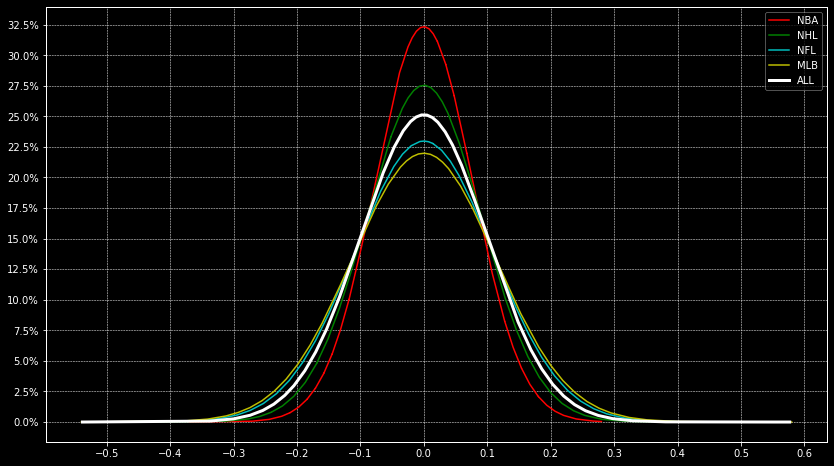

In [278]:
import matplotlib.style as mplstyle
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots(figsize=(14, 8))
plt.gca().yaxis.set_major_formatter(PercentFormatter(16))
nfl, = plt.plot(x, y, 'c-',label='NFL')
nba, = plt.plot(x1, y1, 'r-',label='NBA')
nhl, = plt.plot(x2, y2, 'g-',label='NHL')
mlb, = plt.plot(x3, y3, 'y-',label='MLB')
com, = plt.plot(x4, y4, 'w-',lw = 3,label='ALL')
plt.legend(handles=[nba,nhl,nfl,mlb,com])
#mplstyle.use(['dark_background'])
plt.rcParams['axes.facecolor'] = 'k'
plt.rcParams['savefig.facecolor'] = 'k'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = '.25'
plt.rcParams['grid.color'] = 'w'
ax.yaxis.set_major_locator(MultipleLocator(.4))
ax.xaxis.set_major_locator(MultipleLocator(.1))
plt.show()

In [28]:
HIST_BINS = np.linspace(-.60, .60, 38)
HIST_BINS

array([-0.6       , -0.56756757, -0.53513514, -0.5027027 , -0.47027027,
       -0.43783784, -0.40540541, -0.37297297, -0.34054054, -0.30810811,
       -0.27567568, -0.24324324, -0.21081081, -0.17837838, -0.14594595,
       -0.11351351, -0.08108108, -0.04864865, -0.01621622,  0.01621622,
        0.04864865,  0.08108108,  0.11351351,  0.14594595,  0.17837838,
        0.21081081,  0.24324324,  0.27567568,  0.30810811,  0.34054054,
        0.37297297,  0.40540541,  0.43783784,  0.47027027,  0.5027027 ,
        0.53513514,  0.56756757,  0.6       ])

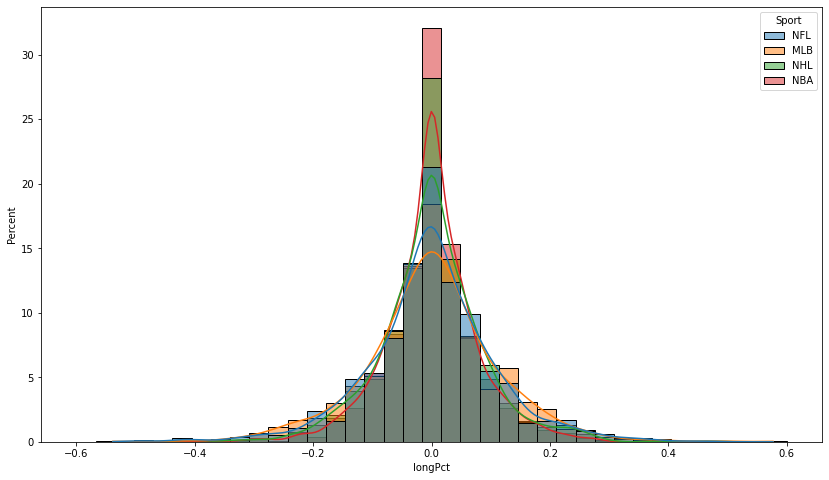

In [145]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",bins=HIST_BINS,stat="percent",kde=True,common_norm=False,discrete=False,common_bins=True,fill=True,element='bars',multiple='layer')
plt.show()

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

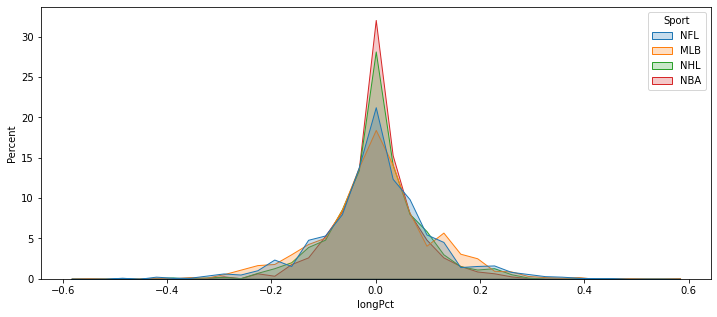

In [191]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(x="longPct",data=df_all,hue="Sport",bins=HIST_BINS,stat="percent",common_norm=False,discrete=False,common_bins=True,fill=True,element='poly',multiple='layer')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

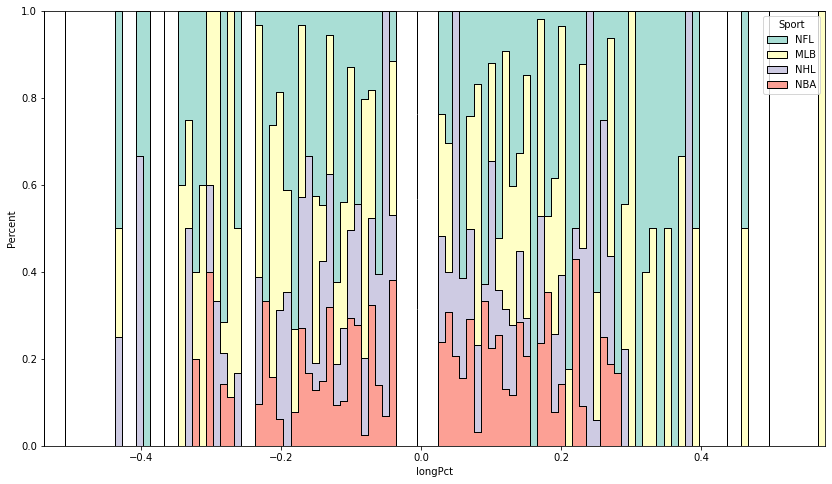

In [161]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",stat="percent",common_norm=True,discrete=False,palette="Set3",common_bins=True,fill=True,element='step',multiple='fill')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

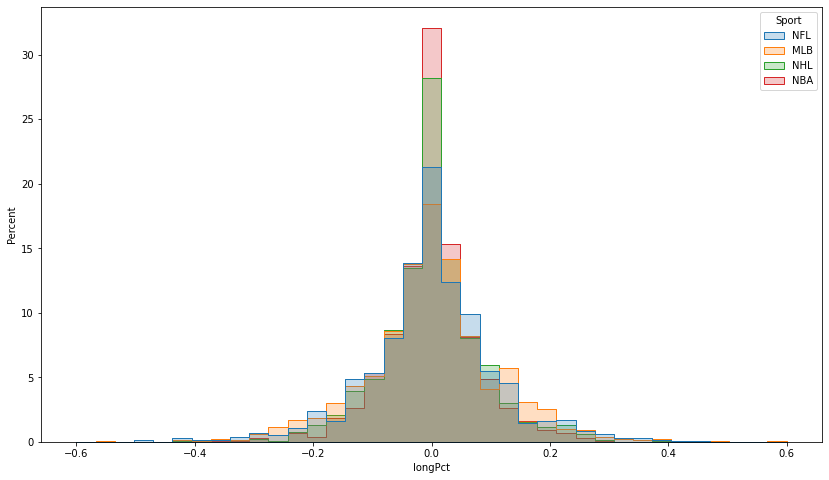

In [155]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",bins=HIST_BINS,stat="percent",common_norm=False,discrete=False,common_bins=False,fill=True,element='step')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

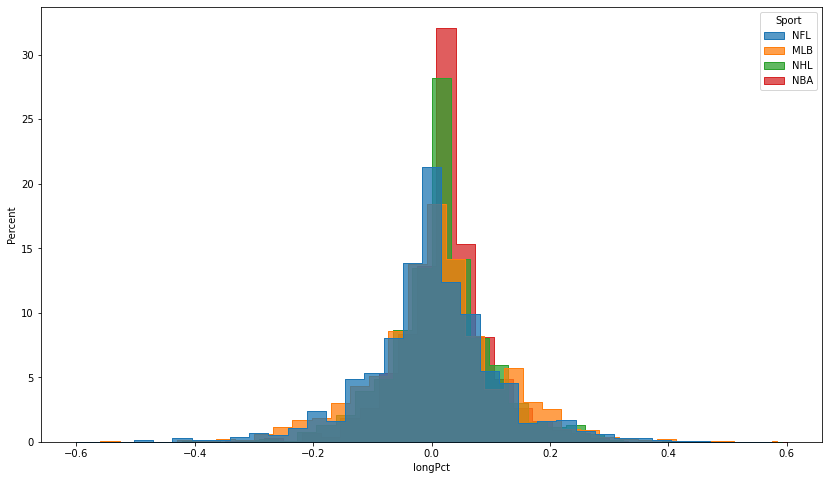

In [56]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",bins=HIST_BINS,stat="percent",common_norm=False,discrete=False,common_bins=False,fill=True,element='step',multiple='dodge')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

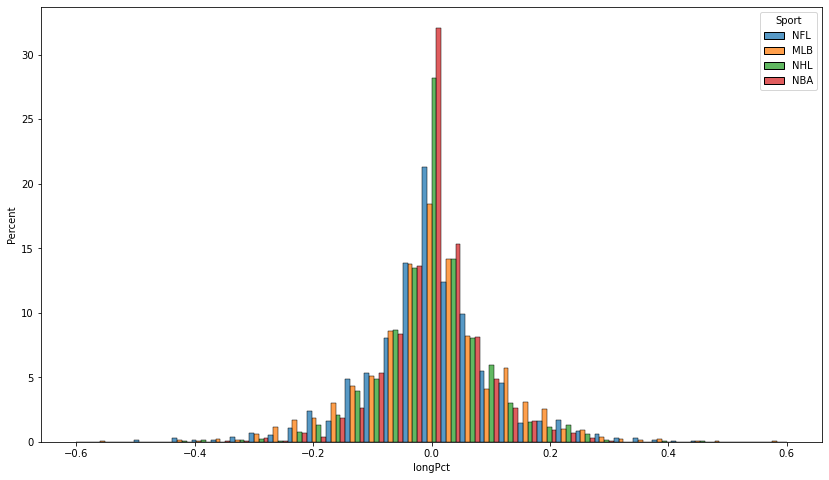

In [110]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",bins=HIST_BINS,stat="percent",common_norm=False,discrete=False,common_bins=True,fill=True,element='bars',multiple='dodge')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

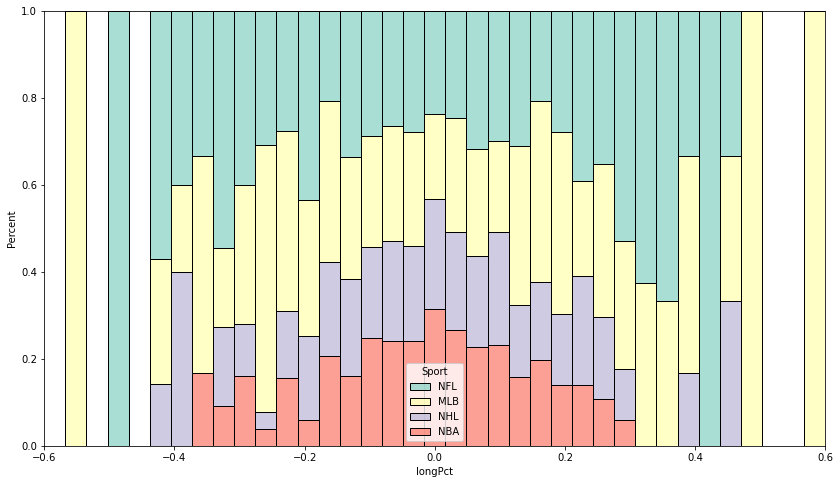

In [97]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",bins=HIST_BINS,stat="percent",common_norm=True,discrete=False,palette="Set3",common_bins=True,fill=True,element='bars',multiple='fill')

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

/home/connermcnicholas/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


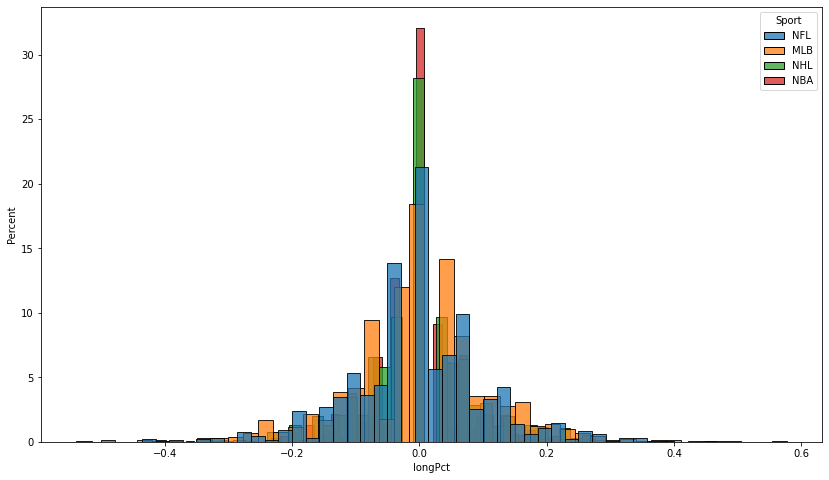

In [123]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",stat="percent",common_norm=False,discrete=False,common_bins=False,fill=True,multiple="stack")

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

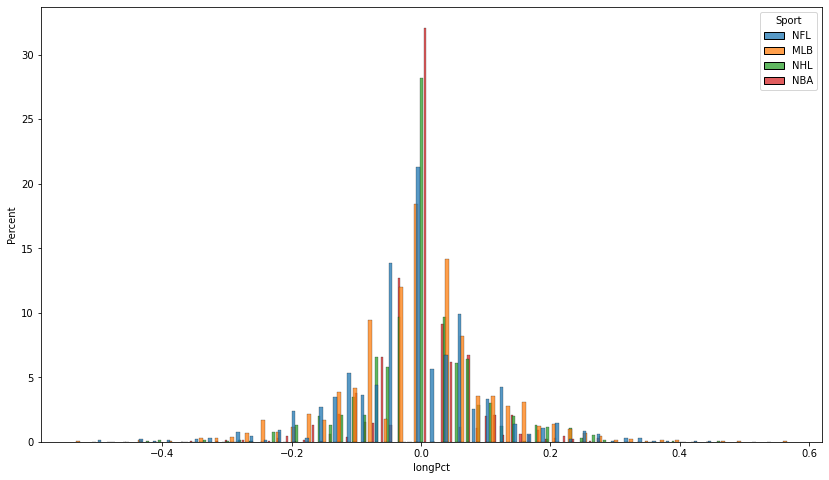

In [124]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",stat="percent",common_norm=False,discrete=False,common_bins=False,fill=True,multiple="dodge")

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

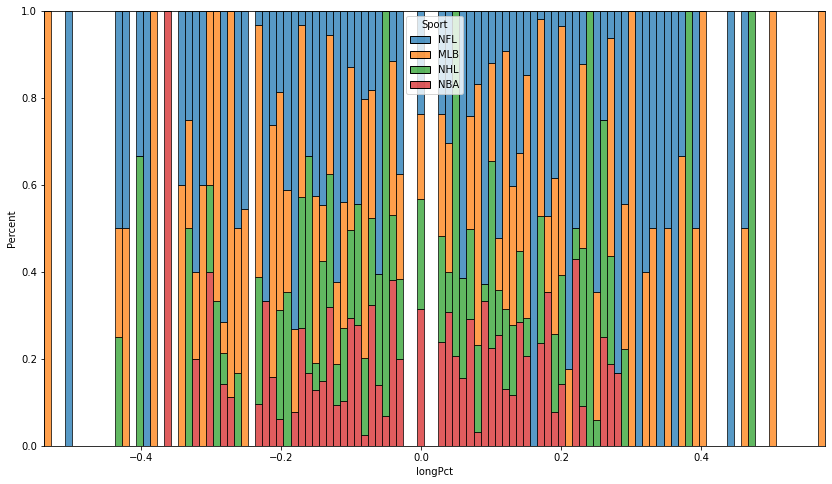

In [130]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",stat="percent",common_norm=True,discrete=False,common_bins=True,fill=True,multiple="fill")

<AxesSubplot:xlabel='longPct', ylabel='Percent'>

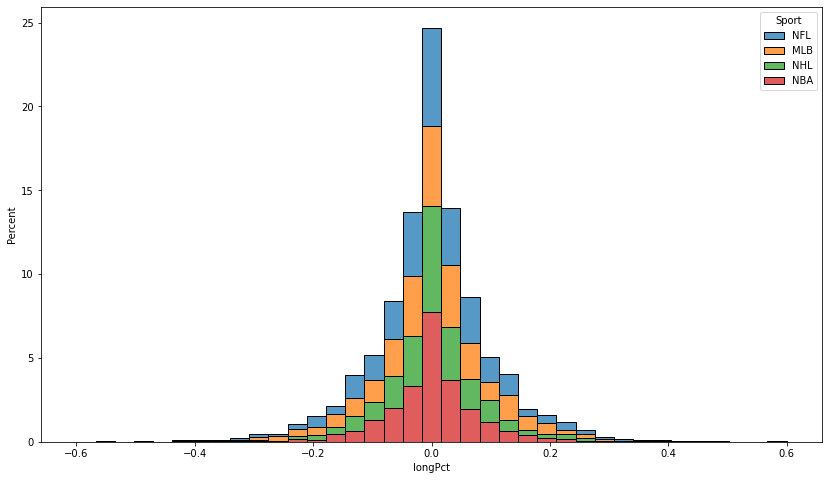

In [192]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(x="longPct",data=df_all,hue="Sport",stat="percent",bins=HIST_BINS,fill=True,cbar=True,element='bars',multiple='stack')

<function matplotlib.pyplot.show(close=None, block=None)>

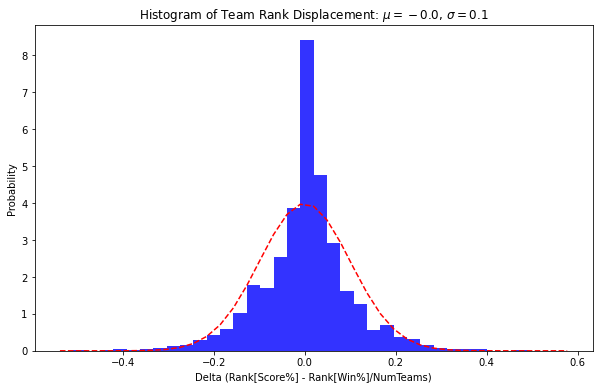

In [41]:
mu = round(statistics.mean(list(df_all.longPct)),2) # mean of distribution
sigma = round(statistics.pstdev(list(df_all.longPct)),2) # standard deviation of distribution
x = list(df_all.longPct)

num_bins = 38
#num_bins = ((max(x)-min(x)))
fig, ax = plt.subplots(figsize=(10, 6))

n, bins, patches = plt.hist(x, num_bins, density=True, facecolor='blue', alpha=0.8)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#lt.gca().yaxis.set_major_formatter(PercentFormatter(1/(100/20)))
plt.xlabel('Delta (Rank[Score%] - Rank[Win%]/NumTeams)')
plt.ylabel('Probability')
plt.title(r'Histogram of Team Rank Displacement: $\mu=%s$, $\sigma=%s$' % (mu,sigma))

plt.show

<Figure size 432x288 with 0 Axes>

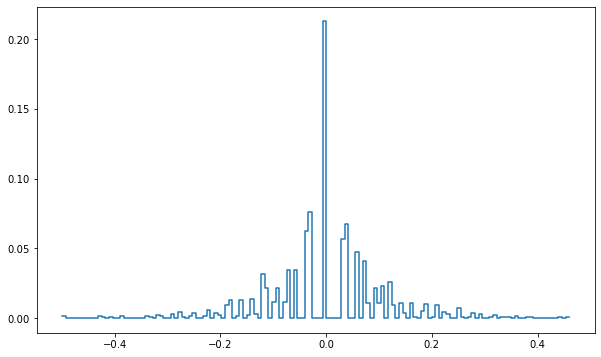

In [36]:
nx, xbins, ptchs = plt.hist(dlpctNFL,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNFL:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNFL,2*len((set(dlpctNFL))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x,y)

<Figure size 432x288 with 0 Axes>

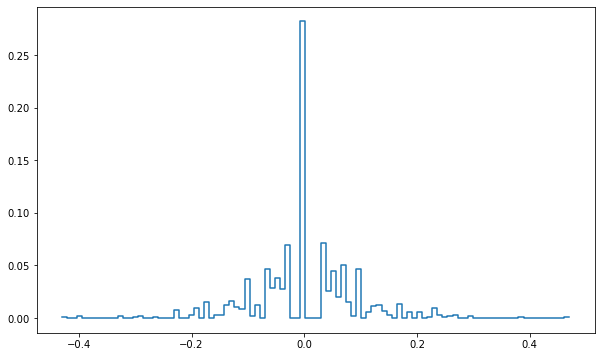

In [37]:
nx, xbins, ptchs = plt.hist(dlpctNHL,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNHL:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNHL,2*len((set(dlpctNHL))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x,y)

<Figure size 432x288 with 0 Axes>

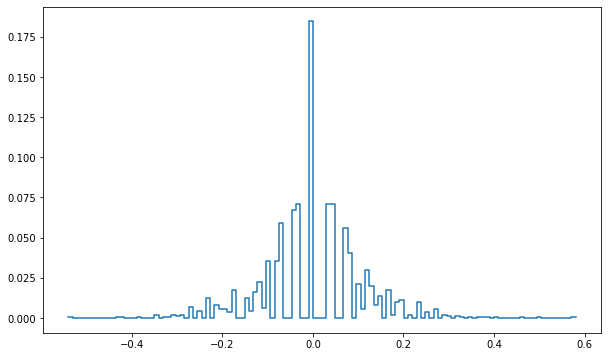

In [38]:
nx, xbins, ptchs = plt.hist(dlpctMLB,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctMLB:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctMLB,2*len((set(dlpctMLB))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x,y)

<Figure size 432x288 with 0 Axes>

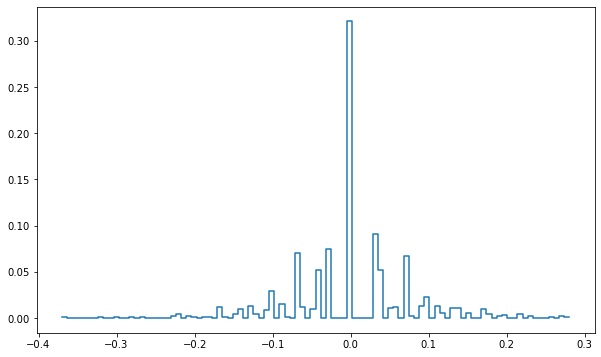

In [39]:
nx, xbins, ptchs = plt.hist(dlpctNBA,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNBA:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNBA,2*len((set(dlpctNBA))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x,y)